In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('../base_dados/beber_copia2.csv', low_memory=False)


                   Feature  Importance
1                      age    0.122063
2                   height    0.095212
6         smk_stat_type_cd    0.069132
11         waistline_grupo    0.066898
0                      sex    0.063928
12            weight_grupo    0.060395
15         hdl_chole_grupo    0.057649
16         ldl_chole_grupo    0.055448
14         tot_chole_grupo    0.053896
7                sbp_grupo    0.048669
18          sgot_ast_grupo    0.045133
17      triglyceride_grupo    0.041334
9               blds_grupo    0.037270
8                dbp_grupo    0.034531
19         gamma_gtp_grupo    0.030955
4              sight_right    0.027849
3               sight_left    0.027105
10        hemoglobin_grupo    0.025030
13  serum_creatinine_grupo    0.021849
5            urine_protein    0.015655


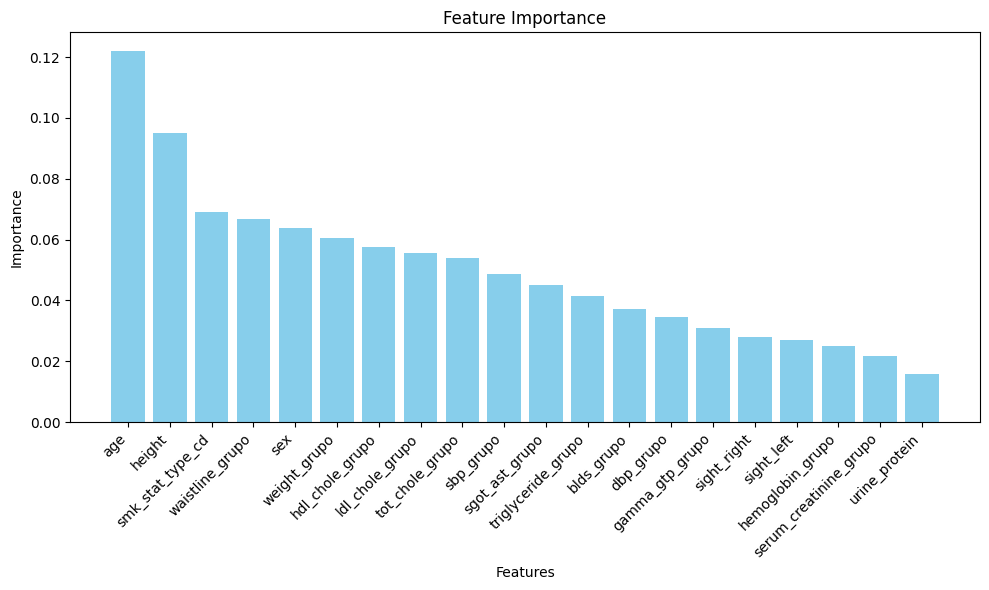

In [2]:
X = df.drop(columns=['drk_yn'])  # Dados preditores
y = df['drk_yn']  # Coluna alvo

# Treinar um modelo de Random Forest para calcular as importâncias dos atributos
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obter as importâncias dos atributos
importances = model.feature_importances_

# Criar um DataFrame para organizar as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar as características por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibir o ranking
print(feature_importance_df)



# Criar um gráfico de barras para a importância dos atributos
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [3]:
df.drop(columns=['sight_left'], inplace=True)
df.drop(columns=['sight_right'], inplace=True)
df.drop(columns=['hemoglobin_grupo'], inplace=True)
df.drop(columns=['serum_creatinine_grupo'], inplace=True)
df.drop(columns=['urine_protein'], inplace=True)


In [4]:
df.to_csv('../base_dados/beber_copia3.csv', index=False)